# O-mode LFS/HFS

This is not the best diagnostic. Not even by a longshot. But it is the most honest by several parsecs.

## Reading and plotting the data

In [3]:
from ipfnpytools.getsig import getsig
from ipfnpytools.closest import closest
import matplotlib.pyplot as plt
plt.style.use('./Styles/darklab.mplstyle')

In [17]:
shotnr = 30554
nelfs = getsig(shotnr, 'RPS', 'neb_LFS')
nehfs = getsig(shotnr, 'RPS', 'neb_HFS')

#Separatrix positions
rin = getsig(shotnr, 'GQH', 'Rin')
raus = getsig(shotnr, 'GQH', 'Raus')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


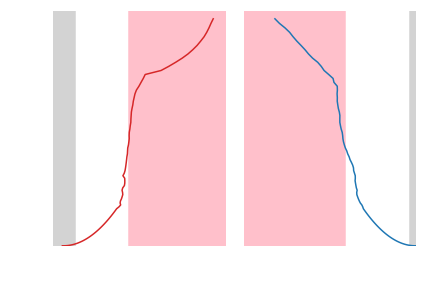

In [29]:
time = 1.1
tind = closest(nelfs.time, time)

fig, ax = plt.subplots(ncols=2, sharey=True)

ax[0].plot(nehfs.area.data[tind, :], nehfs.data[tind, :]*1e-19, color='C3')

ax[1].plot(nelfs.area.data[tind, :], nelfs.data[tind, :]*1e-19, color='C0')

#labels & text
ax[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
ax[0].set_xlabel('HFS R [m]')
ax[1].set_xlabel('LFS R [m]')
ax[1].set_ylim(0, 2.2)
ax[0].text(1.05, 1.5, 'inner wall', rotation=270)
ax[1].text(2.21, 1.5, 'ICRH limiter', rotation=90, ha='left')

#Inner vessel wall
ax[0].axvspan(1.0, 1.045, color='#D3D3D3')
#ICRH limiter
ax[1].axvspan(2.22, 2.23, color='#D3D3D3')

#Readjust X axis
ax[0].set_xlim(1.0, 1.35)
ax[1].set_xlim(1.98, 2.23)

#Separatrices
rinr = rin.data[closest(rin.time, time)]
ax[0].axvspan(rinr, 1.35, color='#FFC0CB')

rausr = raus.data[closest(raus.time, time)]
ax[1].axvspan(1.98, rausr, color='#FFC0CB')

plt.tight_layout()
plt.show()

## Magnetic equilibrium

In [33]:
import dd #To read 
import kk_abock
import numpy as np

In [34]:
eq = kk_abock.kk()
eq.Open(shotnr, diag='EQH')

#Get the antenna Z
rps = dd.shotfile('RPS', shotnr)
zl = rps.getParameter('AuxInfo', 'z_lfs')
zh = rps.getParameter('AuxInfo', 'z_hfs') 
rps.close()

In [35]:
rhol = eq.Rz_to_rhopol(time, nelfs.area.data[tind,:], np.ones_like(nelfs.area.data[tind,:])*zl.data)
rhoh = eq.Rz_to_rhopol(time, nehfs.area.data[tind,:], np.ones_like(nehfs.area.data[tind,:])*zh.data)

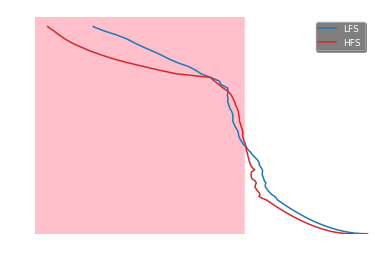

In [39]:
plt.plot(rhol, nelfs.data[tind,:],'C0',label='LFS')
plt.plot(rhoh, nehfs.data[tind,:],'C3',label='HFS')
plt.axvspan(0.75,1.0, color='#FFC0CB')

plt.xlim(0.75, 1.15)
plt.ylim(bottom=0)

plt.xlabel(r'$\mathrm{\rho_{pol}}$')
plt.legend()
plt.show() 